# Lab 2
### Autor: Franciszek Data

In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

Wczytanie danych:

In [2]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

In [3]:
display(data)

array([[-20.        ,  -7.516433  ],
       [-19.19192   ,  -6.438935  ],
       [-18.383839  ,  -6.5596294 ],
       [-17.575758  ,  -7.0477824 ],
       [-16.767677  ,  -6.883803  ],
       [-15.959596  ,  -5.5132365 ],
       [-15.151515  ,  -4.7579975 ],
       [-14.343434  ,  -5.6220145 ],
       [-13.535354  ,  -3.71292   ],
       [-12.727273  ,  -3.9765189 ],
       [-11.919192  ,  -2.9224136 ],
       [-11.111111  ,  -2.3681533 ],
       [-10.30303   ,  -3.0927727 ],
       [ -9.494949  ,  -2.798137  ],
       [ -8.686869  ,  -2.648938  ],
       [ -7.878788  ,  -2.289801  ],
       [ -7.070707  ,  -1.8698375 ],
       [ -6.262626  ,  -1.9554752 ],
       [ -5.4545455 ,  -0.09174228],
       [ -4.646465  ,  -0.34343567],
       [ -3.838384  ,   0.18749848],
       [ -3.030303  ,  -0.684162  ],
       [ -2.2222223 ,  -0.6887711 ],
       [ -1.4141414 ,   1.5642335 ],
       [ -0.6060606 ,   1.5549055 ],
       [  0.2020202 ,   0.7648572 ],
       [  1.010101  ,   0.43263912],
 

In [4]:
x = data[:, 0]
y = data[:, 1]

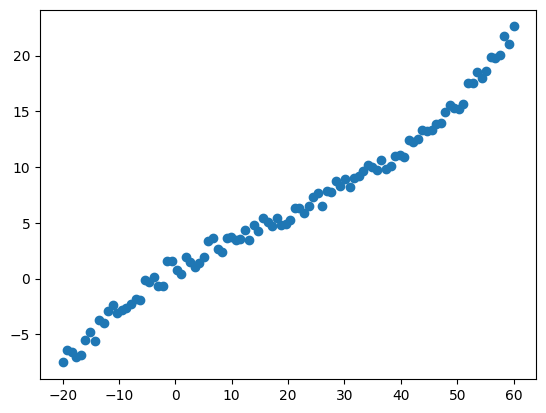

In [5]:
plt.figure()
plt.scatter(x, y)
plt.show()
theta_0 = 3
theta_1 = 4

In [6]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_0 + x * theta_1

In [7]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    return ((h_fun(x, theta_0, theta_1) - y)**2).sum() / (2*x.shape[0])

In [8]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

In [43]:
def draw(x, y, theta_0, theta_1):
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, x * theta_1 + theta_0, 'g')
    plt.show()

In [29]:
def computeDerivative(x, y, theta_0, theta_1):
    size = x.shape[0]
    xderivative = 0
    for i in range(size):
        xderivative += (h_fun(x[i], theta_0, theta_1) - y[i]) * x[i]

    xderivative = xderivative / size

    yderivative = (h_fun(x, theta_0, theta_1) - y).sum() / size

    return [yderivative, xderivative]

In [40]:
def simpleLinearRegression(x, y, theta_0, theta_1, learningRate, epsilon):
    i = 0
    costList = []
    derivatveList = []
    theta_0_list = []
    theta_1_list = []

    while(i < 2 or abs((costList[i-1] - costList[i-2])) > epsilon):
        derivatives = computeDerivative(x, y, theta_0, theta_1)
        derivatveList.append(derivatives)
        theta_0_derivative = derivatives[0]
        theta_1_derivative = derivatives[1]

        theta_0 = theta_0 - learningRate * theta_0_derivative
        theta_1 = theta_1 - learningRate * theta_1_derivative

        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        cost = calculate_cost(x, y, theta_0, theta_1)
        costList.append(cost)
        print(cost)

        i += 1

    return [theta_0, theta_1, i, costList[-1]]

In [41]:
theta_0, theta_1, i, cost = simpleLinearRegression(x, y, theta_0, theta_1, alpha, eps)

0.6460328674316407
0.6460222625732421
0.6460124206542969


theta_0: 0.09713452599535533, theta_1: 0.3134657038414949
cost: 0.6460124206542969


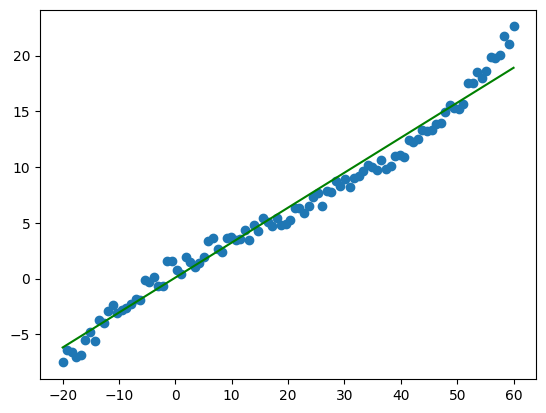

In [44]:
print(f"theta_0: {theta_0}, theta_1: {theta_1}")
print(f"cost: {cost}")
draw(x, y, theta_0, theta_1)